In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt

In [57]:
arq=pd.read_csv('C:/Users/gabri/OneDrive/Documentos/churn.csv', sep = ',', index_col='RowNumber')
arq.drop(['CustomerId', 'Surname'], axis=1, inplace = True)

arq

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [58]:
arq=arq.rename(columns = {'CreditScore':'pt_Credito',
                      'Geography':'Pais','Gender':'genero','Age':'idade','Tenure':'estabilidade','Balance':'saldo',
                      'NumOfProducts':'aquisiçao','HasCrCard':'credito','IsActiveMember':'conta_at',
                      'EstimatedSalary':'salario_est','Exited':'esta_no_banco'})
arq

,pt_Credito,Pais,genero,idade,estabilidade,saldo,aquisiçao,credito,conta_at,salario_est,esta_no_banco
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


QUANTIDADE DE CARTAO DE CREDITO

paises com mais desistencia


base salarial que ppermanece e que de sai


idade de mair desistencia 


pontuação de credito

proporção

In [66]:
def proporçao (coluna):
    saida=arq.groupby([coluna,'esta_no_banco']).size()
    coluna=arq.groupby(coluna).size()
    return(round((saida/coluna)*100,2)).reset_index(name='proporção')

## PROPORÇÃO POR GÊNERO 

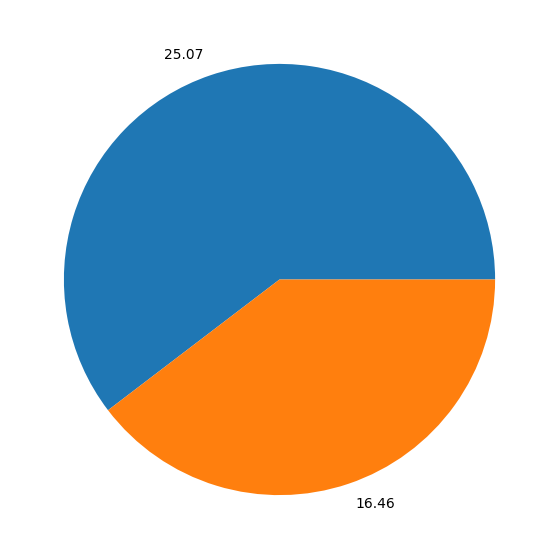

        esta_no_banco  proporção
genero                          
Female              1      25.07
Male                1      16.46


In [68]:
p1=proporçao('genero').set_index('genero').query('esta_no_banco==1')
fig=plt.figure(figsize=(10,7))
nome=p1['proporção']
plt.pie(nome,labels=nome)
plt.show()
print(p1)

saida do banco embasada no gênero: ver-se que as mulheres com 25% tem maior saida que os homens que tem 16% de saida uma diferença de 9 %.

## PROPORÇÃO POR PAÍS 

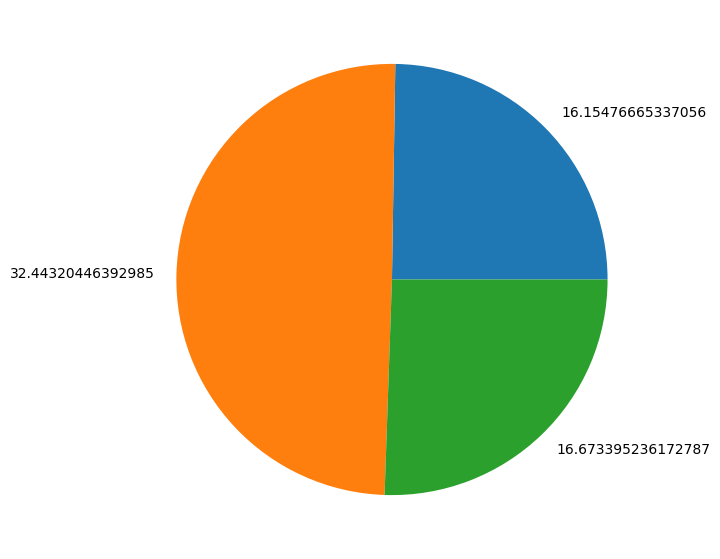

      Pais  esta_no_banco  proporção
1   France              1  16.154767
3  Germany              1  32.443204
5    Spain              1  16.673395


In [63]:
p2=proporçao('Pais').query('esta_no_banco==1')
fig=plt.figure(figsize=(10,7))
nome=p2['proporção']
plt.pie(nome,labels=nome)
plt.show()
print(p2)

 proporção de saída dos bancos da  
França e Espanha têm proporções parecidas 16%, já a germânia tem o dobro de saídas com seus 32%. 


## proporção por crédito

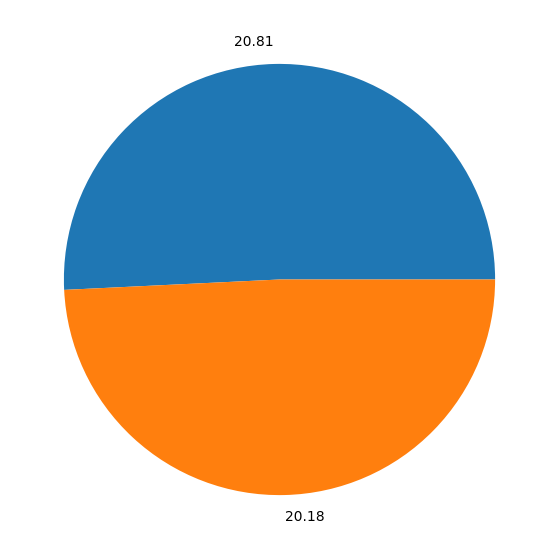

   credito  esta_no_banco  proporção
1        0              1      20.81
3        1              1      20.18


In [70]:
p3=proporçao('credito').query('esta_no_banco==1')
fig=plt.figure(figsize=(10,7))
nome=p3['proporção']
plt.pie(nome,labels=nome)
plt.show()
print(p3)

Pessoas que saíram do banco que possuem cartão de crédito saem menos que as pessoas que têm outro tipo de cartão, contudo a diferença é mínima de 0,63%.

## proporção de saída do banco a partir dos produtos adquiridos.

           esta_no_banco  proporção
aquisiçao                          
1                      1      27.71
2                      1       7.58
3                      1      82.71
4                      1     100.00


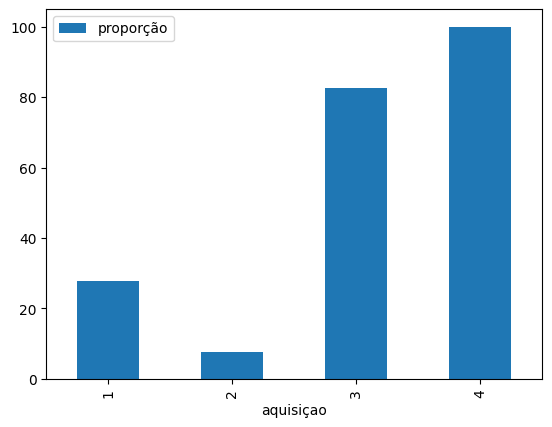

In [93]:
p4=proporçao('aquisiçao').query('esta_no_banco==1').set_index('aquisiçao')
p4.plot(y='proporção',kind='bar')
print(p4)

       esta_no_banco
idade               
46                91
40                89
43                88
45                87
48                80
42                77
47                77
49                75
44                73
39                72
50                71
41                69
51                66
52                64
38                63
37                62
35                57
36                53
54                51
56                50
55                48
33                44
53                40
57                38
31                33
34                33
32                32
60                32
59                30
58                29
29                28
30                24
28                23
61                21
62                21
63                18
26                14
24                14
27                13
64                12
22                12
65                 8
71                 7
66                 7
25                 6
68           

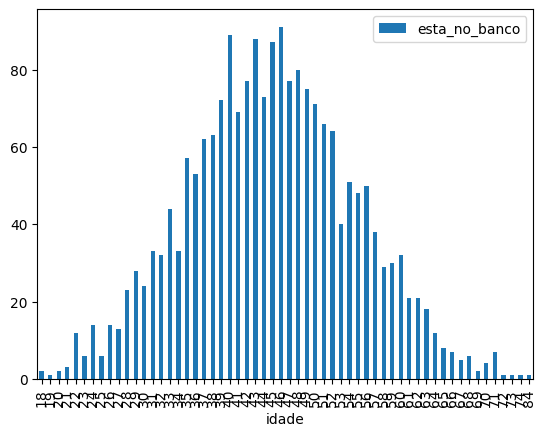

In [115]:
p5=arq[['idade',"esta_no_banco"]].query('esta_no_banco==1').groupby('idade').agg('sum')
p5.plot(y='esta_no_banco',kind='bar')
print(p5.sort_values('esta_no_banco',ascending=False))


## salário   

In [127]:
p6=arq[['saldo','salario_est','esta_no_banco','genero']].query('esta_no_banco==1 & genero=="Female"')
media_sala=(round((p6['salario_est'].agg('sum'))/(len(p6['salario_est'])),2))
media_sal=(round((p6['saldo'].agg('sum'))/(len(p6['saldo'])),2))
print(f'a média salarial é de {media_sala} e a média de saldos do banco é de {media_sal}')

a média salarial é de 102948.99 e a média de saldos do banco é de 89036.64


## Perfil de evasão do banco baseado no gênero na nacionalidade. 

O perfil de cliente que se evade do banco são mulheres entre 40-50 anos que ganham  102.948,99 e com um saldo bancário de 89.036,64 que possui em geral 4 produtos do banco e a utilização de crédito não afeta sua saída.